### HCP Data - Unprocessed, 3T

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 40]

In [3]:
import radio as rio
from radio.data.datautils import get_first_batch, plot_batch

#### Setup Data

In [21]:
# Takes a while because it scans CEREBRO Study directory for the data.
# Pre-storing the data into train and test folders will speed up the process.
data = rio.data.HCPDataModule(
    root="/data/HCP_test",
    use_augmentation=False,
    resample=False,
    batch_size=4,
    intensities=["T1", "T2"],
    labels=[],
)
data.prepare_data()
data.setup()

/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:95: LightningDeprecationWarning: DataModule property `train_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:114: LightningDeprecationWarning: DataModule property `val_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:133: LightningDeprecationWarning: DataModule property `test_transforms` was deprecated in v1.5 and will be removed in v1.7.
  rank_zero_deprecation(
/home/dinize@acct.upmchs.net/anaconda3/envs/radio/lib/python3.10/site-packages/pytorch_lightning/core/datamodule.py:149: LightningDeprecationWarning: DataModule property `dims` was deprecated in v1.5 and wi

In [22]:
print(f"Training: {data.size_train} subjects.")
print(f"Validation: {data.size_val} subjects.")
print(f"Test: {data.size_test} subjects.")

Training: 4 subjects.
Validation: 0 subjects.
Test: 1 subjects.


#### Get a Train and a Test Batch

In [23]:
train_dataloaders = data.train_dataloader()
val_dataloaders = data.val_dataloader()
test_dataloaders = data.test_dataloader()

In [24]:
# Takes a long time if resampling is required.
# Preprocessing beforehand is therefore recommended to speed up training.
train_batch = get_first_batch(train_dataloaders)
test_batch = get_first_batch(test_dataloaders)

In [25]:
print(f"Batch keys: {train_batch.keys()}")
print(f"Number of samples in batch: {len(train_batch)}")
print(f"Sample shape: {train_batch['T1']['data'].shape}")
print(f"Image keys: {train_batch['T1'].keys()}")

Batch keys: dict_keys(['subj_id', 'T1', 'T2'])
Number of samples in batch: 3
Sample shape: torch.Size([4, 1, 160, 192, 160])
Image keys: dict_keys(['data', 'affine', 'path', 'stem', 'type'])


#### Plot Example Samples from Batches

Subject: 0


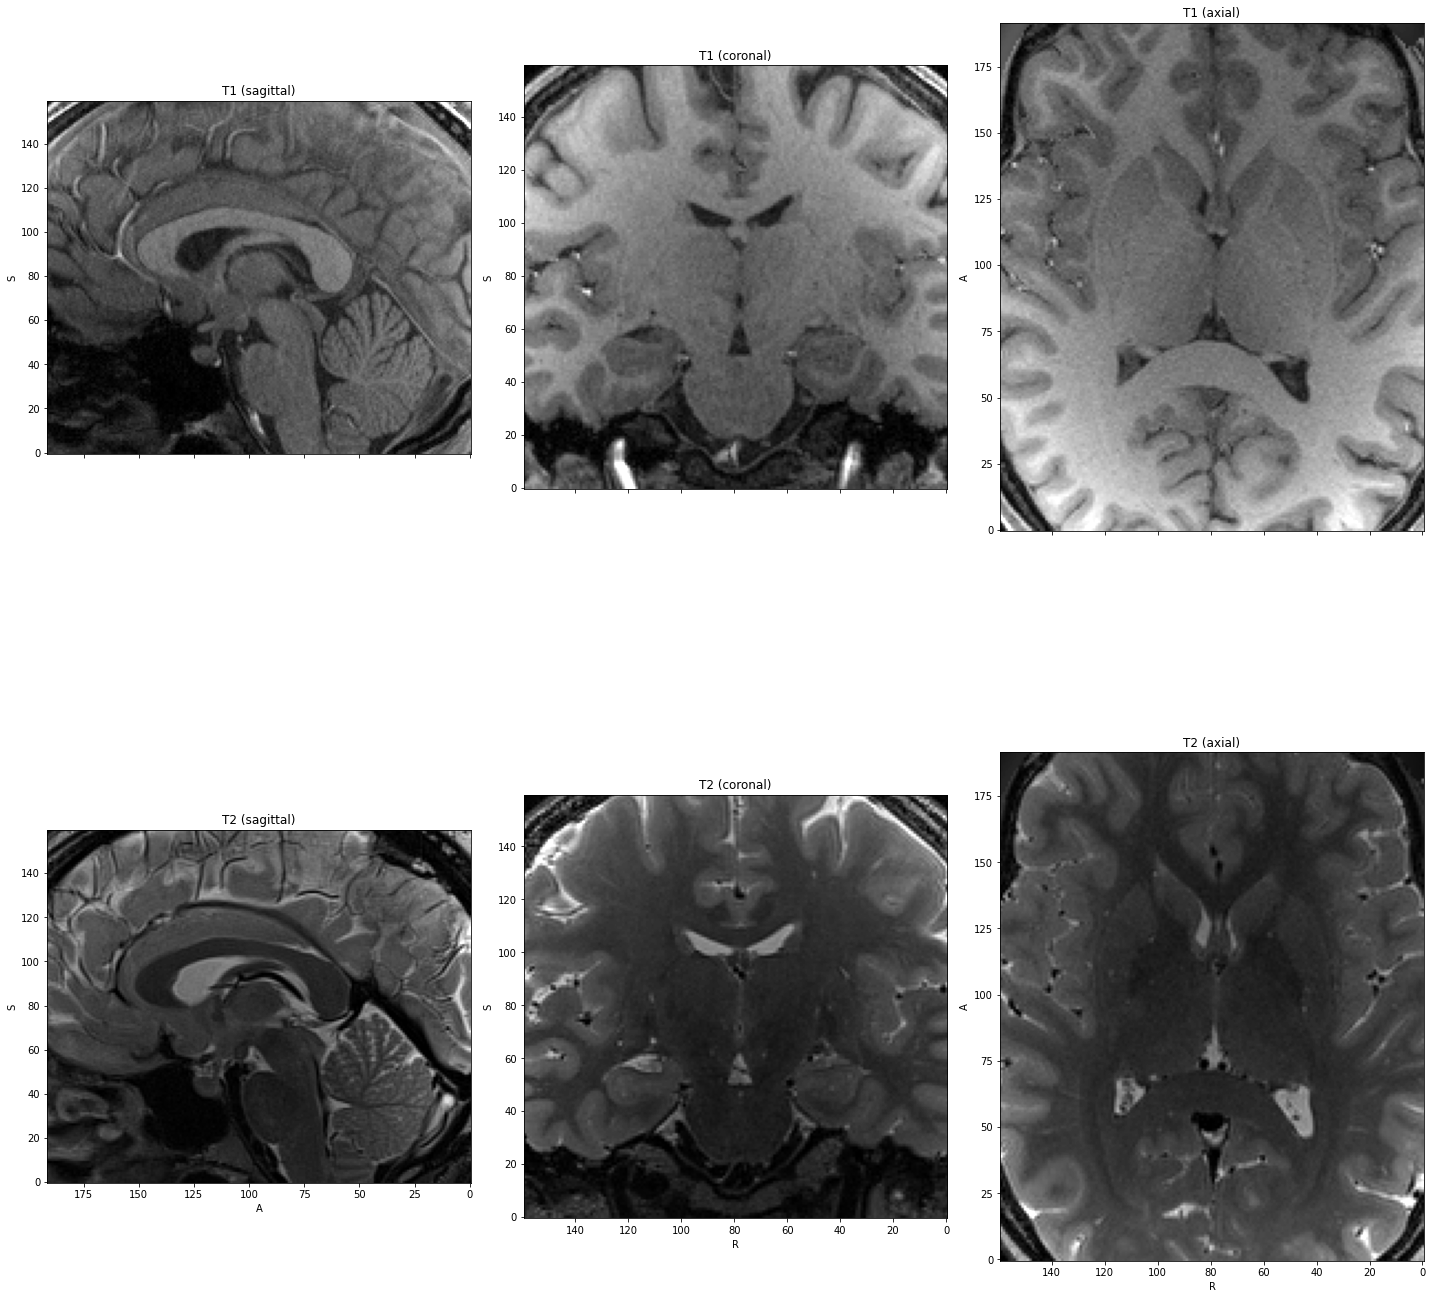



Subject: 1


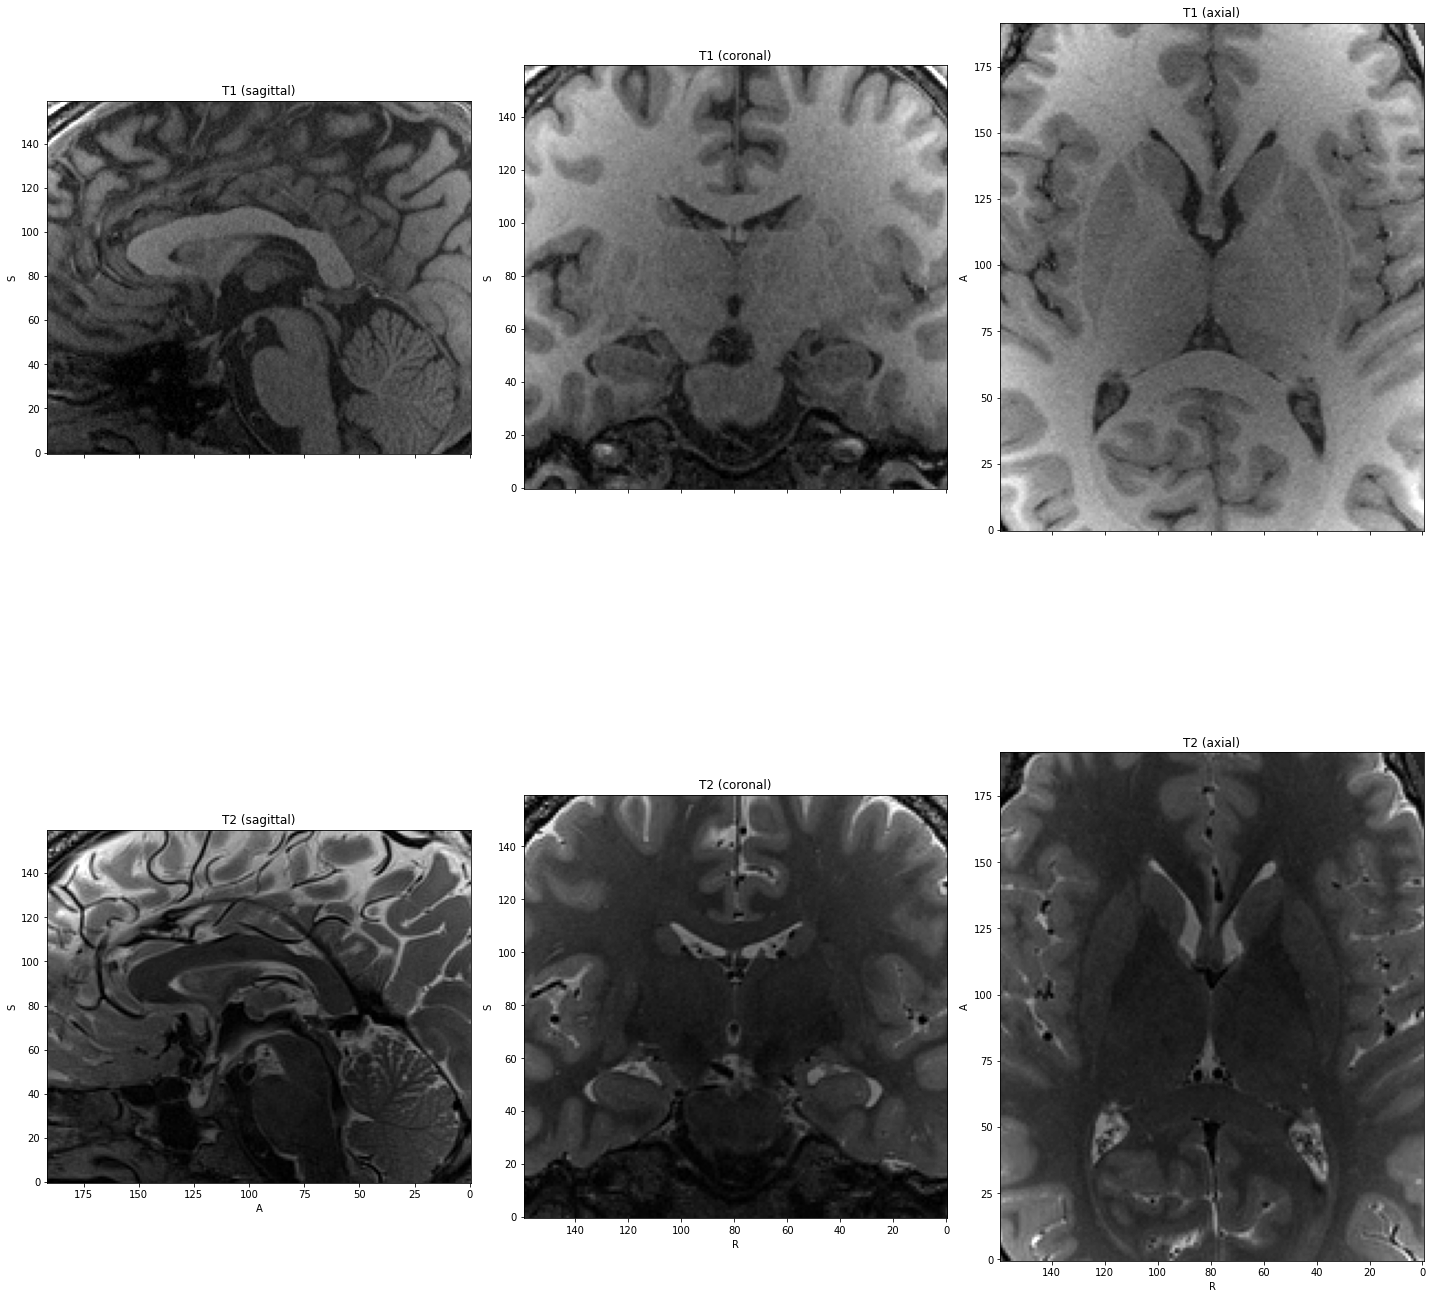



Subject: 2


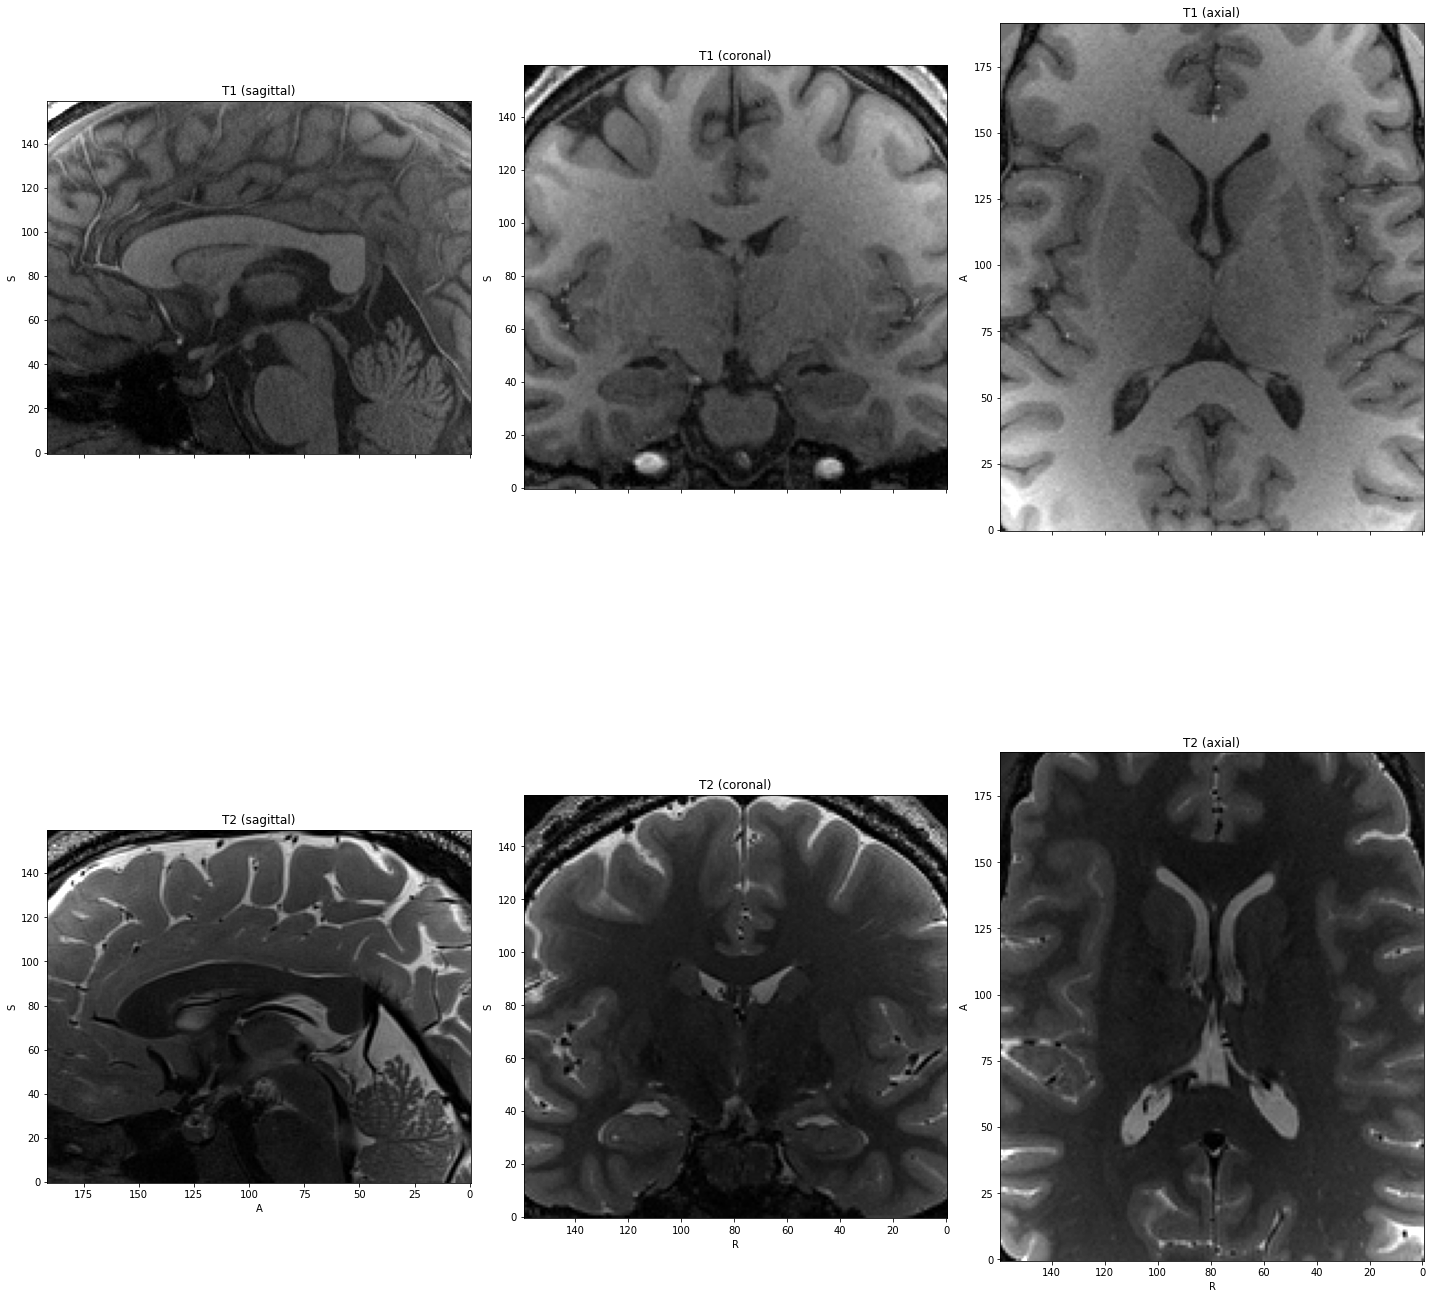

In [26]:
plot_batch(train_batch)

Subject: 0


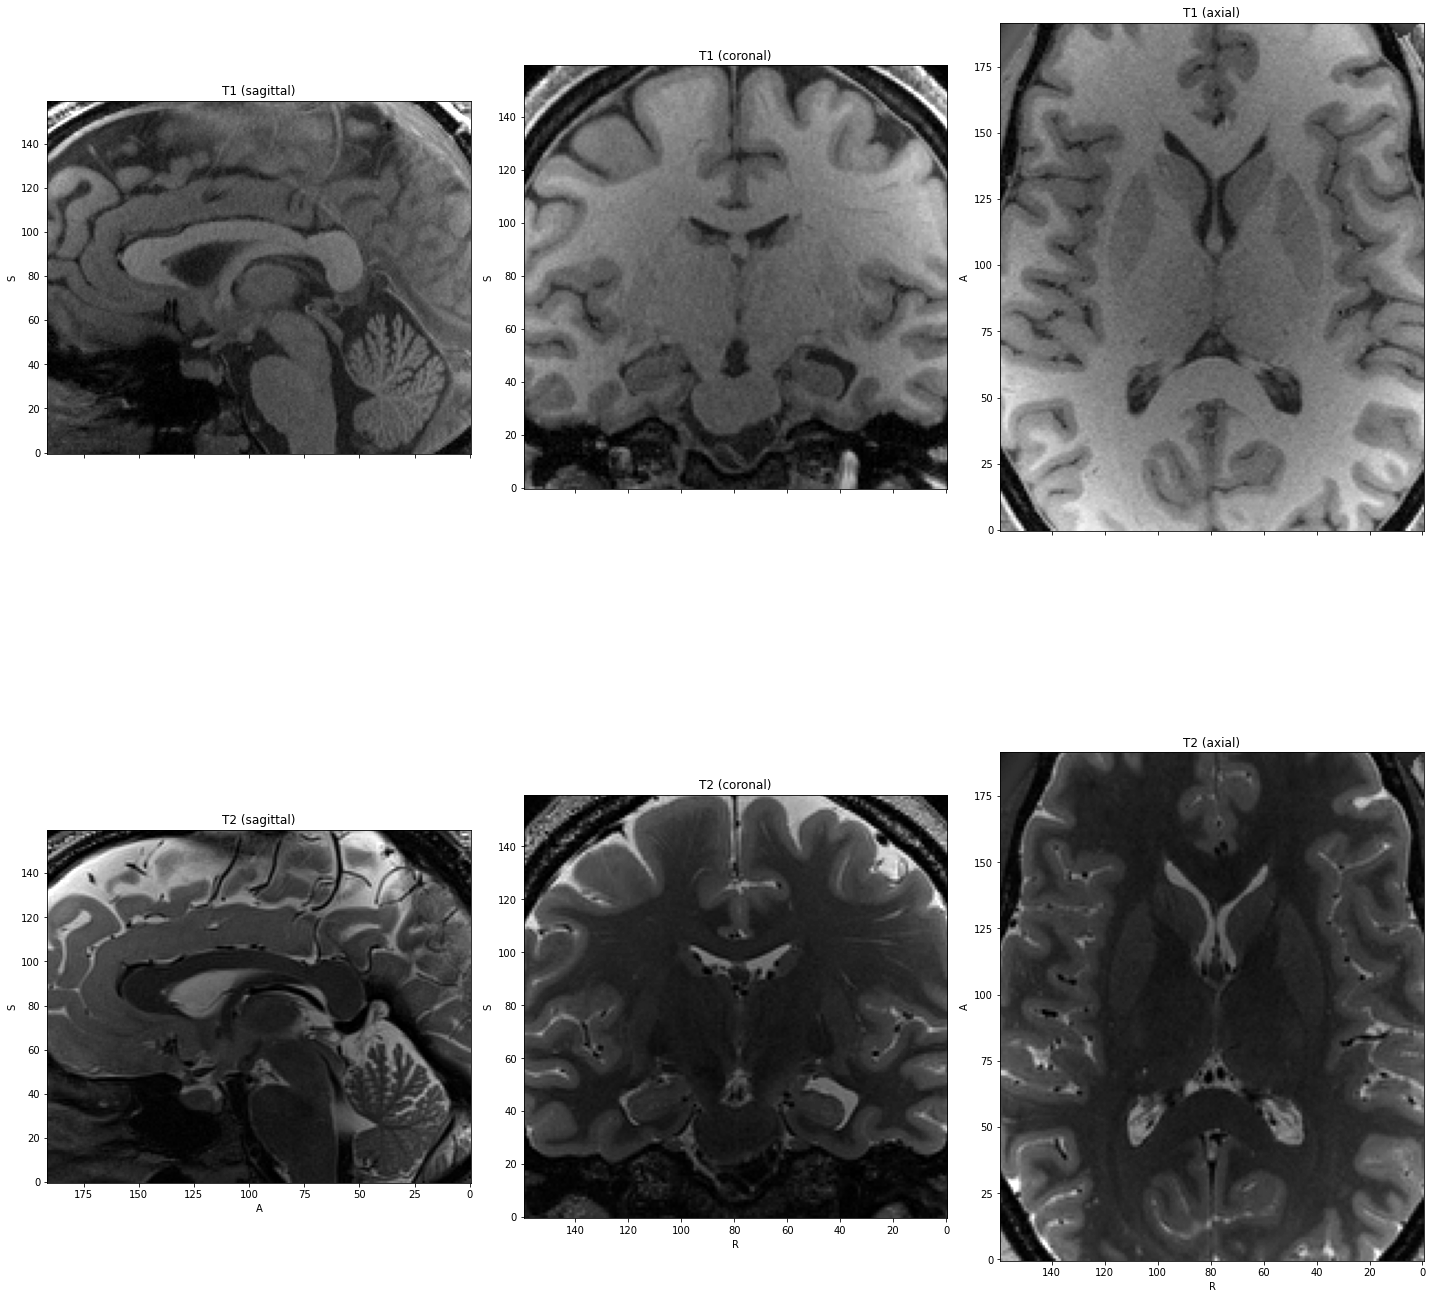

In [27]:
plot_batch(test_batch)